Reference
* https://ithelp.ithome.com.tw/users/20107514/ironman/1399
* https://zh.wikipedia.org/wiki/LU%E5%88%86%E8%A7%A3
* https://www.geeksforgeeks.org/finding-inverse-of-a-matrix-using-gauss-jordan-method/

In [15]:
### Deal with input ###

import csv
import numpy as np
import math


print('Enter the number of polynomial base n')
n = int(input())

print('Enter lambda')
lambda_ = int(input())


with open('testfile.csv', newline='') as testfile:
    rows = csv.reader(testfile)
    
    x_row_tmp = []
    x_list_tmp = []
    y_list_tmp = []
    
    for row in rows:
        x_row_tmp = []
        for i in range(n-1):
            x_row_tmp.append(math.pow(float(row[0]), n-1-i))
        x_row_tmp.append(1)
        
        x_list_tmp.append(x_row_tmp)
        
        y_list_tmp.append(float(row[1])) 
        
    A = np.array(x_list_tmp)
    b = np.array(y_list_tmp)
    b=b.reshape(len(b),1)
    
    print(A)
    print(b)

Enter the number of polynomial base n
3
Enter lambda
10000
[[ 2.50000000e+01 -5.00000000e+00  1.00000000e+00]
 [ 2.30008330e+01 -4.79591837e+00  1.00000000e+00]
 [ 2.10849646e+01 -4.59183673e+00  1.00000000e+00]
 [ 1.58371512e+01 -3.97959184e+00  1.00000000e+00]
 [ 1.27551020e+01 -3.57142857e+00  1.00000000e+00]
 [ 8.75676801e+00 -2.95918367e+00  1.00000000e+00]
 [ 7.59058726e+00 -2.75510204e+00  1.00000000e+00]
 [ 3.00916285e+00 -1.73469388e+00  1.00000000e+00]
 [ 1.75968347e+00 -1.32653061e+00  1.00000000e+00]
 [ 8.43398584e-01 -9.18367347e-01  1.00000000e+00]
 [ 5.10204082e-01 -7.14285714e-01  1.00000000e+00]
 [ 9.37109538e-02 -3.06122449e-01  1.00000000e+00]
 [ 1.04123282e-02  1.02040816e-01  1.00000000e+00]
 [ 5.10204082e-01  7.14285714e-01  1.00000000e+00]
 [ 1.25989171e+00  1.12244898e+00  1.00000000e+00]
 [ 3.00916285e+00  1.73469388e+00  1.00000000e+00]
 [ 3.75885048e+00  1.93877551e+00  1.00000000e+00]
 [ 6.50770512e+00  2.55102041e+00  1.00000000e+00]
 [ 8.75676801e+00  2.95

Ax=I
LUx=I
Ux=y
Ly=I

In [16]:
def solve_Ux_y(U,y):
    rows = U.shape[0]
    cols = U.shape[1]

    x = np.array([ [0.0 for j in range(cols)] for i in range(rows)])
    
    l = 0
    for i in reversed(range(rows)):
        for j in reversed(range(cols)):
            tmp = y[j][l]
            for k in range(cols-1-j):
                tmp = tmp - U[j][k+j+1]*x[k+j+1][l]
            x[j][l] = tmp / U[j][j]
        l += 1
                
            
    return x

In [17]:
def solve_Ly_I(L):
    rows = L.shape[0]
    cols = L.shape[1]
    
    y = np.array([ [0.0 for j in range(cols)] for i in range(rows)])
    I = np.eye(rows)
    
    for i in range(rows):
        for j in range(cols):
            tmp = I[i][j]
            for k in range(j):
                tmp = tmp - L[j][k]*y[k][i]
            y[j][i] = tmp

            
    return y
    

In [18]:
### use LU decomposition to do inverse ###
#M = np.array([[4.0,7.0], [2.0,6.0]])


def LU_inv(M):    
    print(M)
    rows = M.shape[0]
    cols = M.shape[1]
    #print(rows)
    #print(cols)

    L = np.eye(rows)
    U = M
    
    for i in range(rows):
        for j in range(cols):
            if(i>j):
                L[i][j] = U[i][j] / U[j][j]
                U[i] = U[i] - L[i][j] * U[j]
    
    #print("L={}".format(L))
    #print("U={}".format(U))   
    
    
    y = solve_Ly_I(L)
    #print(y)
    x = solve_Ux_y(U,y)
    #print(x)
    
    return x
 
    

#LU_inv(M)

In [19]:
# Linear regression

print(A)
print(b)

AT = A.T
print(AT)

ATA = AT.dot(A)
#print(ATA)

I = np.eye(n)
#print(I)

lambda_I = lambda_ * I
#print(lambda_I)

ATA_p_lambda_I = ATA + lambda_I
print(ATA_p_lambda_I)

'''ATA_p_lambda_I_inv = np.linalg.inv(ATA_p_lambda_I)
print(ATA_p_lambda_I_inv)
print(ATA_p_lambda_I.dot(ATA_p_lambda_I_inv))'''

ATA_p_lambda_I_inv = LU_inv(ATA_p_lambda_I)
print(ATA_p_lambda_I_inv)
print(ATA_p_lambda_I.dot(ATA_p_lambda_I_inv))

'''ATA_p_lambda_I_inv = inv_mat(ATA_p_lambda_I)
print(ATA_p_lambda_I_inv)
print(ATA_p_lambda_I.dot(ATA_p_lambda_I_inv))'''

ATb = AT.dot(b)
print(ATb)

x = ATA_p_lambda_I_inv.dot(ATb)
print(x)


[[ 2.50000000e+01 -5.00000000e+00  1.00000000e+00]
 [ 2.30008330e+01 -4.79591837e+00  1.00000000e+00]
 [ 2.10849646e+01 -4.59183673e+00  1.00000000e+00]
 [ 1.58371512e+01 -3.97959184e+00  1.00000000e+00]
 [ 1.27551020e+01 -3.57142857e+00  1.00000000e+00]
 [ 8.75676801e+00 -2.95918367e+00  1.00000000e+00]
 [ 7.59058726e+00 -2.75510204e+00  1.00000000e+00]
 [ 3.00916285e+00 -1.73469388e+00  1.00000000e+00]
 [ 1.75968347e+00 -1.32653061e+00  1.00000000e+00]
 [ 8.43398584e-01 -9.18367347e-01  1.00000000e+00]
 [ 5.10204082e-01 -7.14285714e-01  1.00000000e+00]
 [ 9.37109538e-02 -3.06122449e-01  1.00000000e+00]
 [ 1.04123282e-02  1.02040816e-01  1.00000000e+00]
 [ 5.10204082e-01  7.14285714e-01  1.00000000e+00]
 [ 1.25989171e+00  1.12244898e+00  1.00000000e+00]
 [ 3.00916285e+00  1.73469388e+00  1.00000000e+00]
 [ 3.75885048e+00  1.93877551e+00  1.00000000e+00]
 [ 6.50770512e+00  2.55102041e+00  1.00000000e+00]
 [ 8.75676801e+00  2.95918367e+00  1.00000000e+00]
 [ 1.58371512e+01  3.97959184e+

In [20]:
### Newton's Method ###

def newton(x_old):
    x_new = x_old - LU_inv(2*ATA).dot((2*ATA.dot(x_old) - 2*ATb))
    
    return x_new


x_old = np.array([ 0 for i in range(n)])
x_old = x_old.reshape(len(x_old),1)


while True:
    x_new = newton(x_old)
    delta = x_new - x_old
    delta = (delta.T).dot(delta)
    print("delta={}".format(delta))
    if delta[0][0] < (10**-3):
        break
    x_old = x_new

print("x_new={}".format(x_new))


[[ 7.98932153e+03 -1.40271061e+02  4.50458142e+02]
 [-1.40271061e+02  4.50458142e+02 -7.14285714e+00]
 [ 4.50458142e+02 -7.14285714e+00  4.60000000e+01]]
delta=[[33.26793902]]
[[ 7.98932153e+03 -1.40271061e+02  4.50458142e+02]
 [-1.40271061e+02  4.50458142e+02 -7.14285714e+00]
 [ 4.50458142e+02 -7.14285714e+00  4.60000000e+01]]
delta=[[7.89631277e-31]]
x_new=[[ 3.02385339]
 [ 4.90619026]
 [-0.23140176]]


LSE:
Fitting line: [0.0469507]X^0 + [0.0931482]X^1 + [0.83453328]X^2
Total error: [22649.73849302]

Newton's Method:
Fitting line: [-0.23140176]X^0 + [4.90619026]X^1 + [3.02385339]X^2
Total error: [26.5599595]


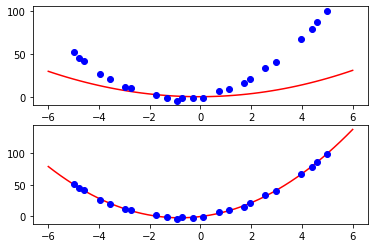

In [21]:
# Output
# Plot input data point and result

import matplotlib.pyplot as plt
import csv


with open('testfile.csv', newline='') as testfile:
    rows = csv.reader(testfile)
    data = []

    for row in rows:     
        data.append([float(row[0]),float(row[1])])
        
    #print(data)

    # Calculate error
    error = 0
    error_newton = 0
    for i in range(len(data)):
        j = n-1
        error_tmp = 0
        error_newton_tmp = 0
        while j>=0 :           
            error_tmp += x[j]*(data[i][0]**(n-1-j))
            error_newton_tmp += x_new[j]*(data[i][0]**(n-1-j))
            j -= 1
        error_tmp = (error_tmp - data[i][1])**2
        error_newton_tmp = (error_newton_tmp - data[i][1])**2
        error += error_tmp
        error_newton += error_newton_tmp
    
    # LSE output
    x_ = np.linspace(-6,6)
    y_ = 0
    i = n-1
    print("LSE:")
    print("Fitting line:",end=' ')
    while i >= 0:
        print(x[i],end='')
        print("X^{}".format(n-1-i),end='')
        if(i!=0):
            print(" + ",end='')
        y_ = y_ + x[i] * (x_**(n-1-i))
        i=i-1
        
    print()
    print("Total error: {}".format(error))
    print()
    
    
    # Newton output
    x_newton_ = np.linspace(-6,6)
    y_newton_ = 0
    i = n-1
    print("Newton's Method:")
    print("Fitting line:",end=' ')
    while i >= 0:
        print(x_new[i],end='')
        print("X^{}".format(n-1-i),end='')
        if(i!=0):
            print(" + ",end='')
        y_newton_ = y_newton_ + x_new[i] * (x_newton_**(n-1-i))
        i=i-1
        
    print()
    print("Total error: {}".format(error_newton))
    
    
    # Plot
    # LSE
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x_, y_, '-r')
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], 'bo-')
    
    # Newton
    plt.subplot(2,1,2)
    plt.plot(x_newton_, y_newton_, '-r')
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], 'bo-')
    